<a href="https://colab.research.google.com/github/fathimashanavas/regression/blob/main/advertising_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSet/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

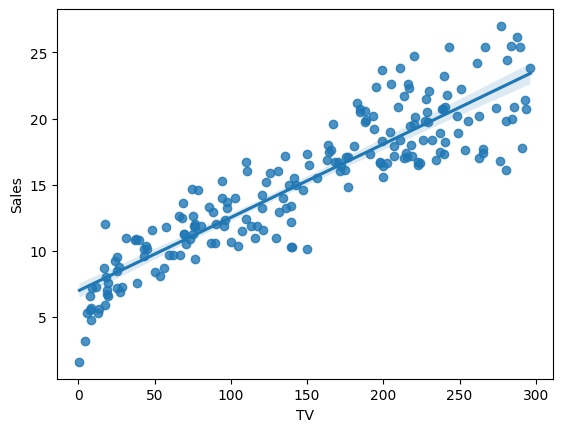

In [ ]:
import seaborn as sns
sns.regplot(x=X['TV'],y=y)

<Axes: xlabel='Radio', ylabel='Sales'>

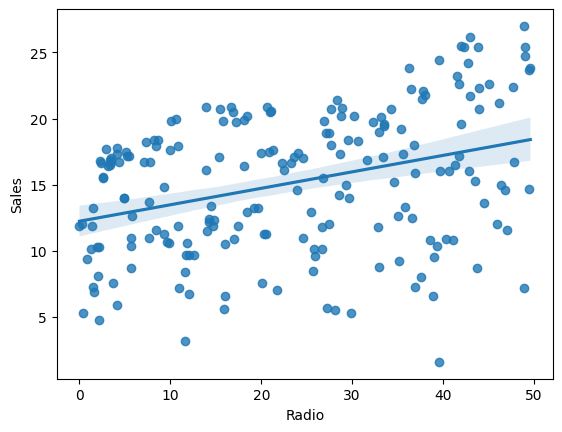

In [ ]:
sns.regplot(x=X['Radio'],y=y)

<Axes: xlabel='Newspaper', ylabel='Sales'>

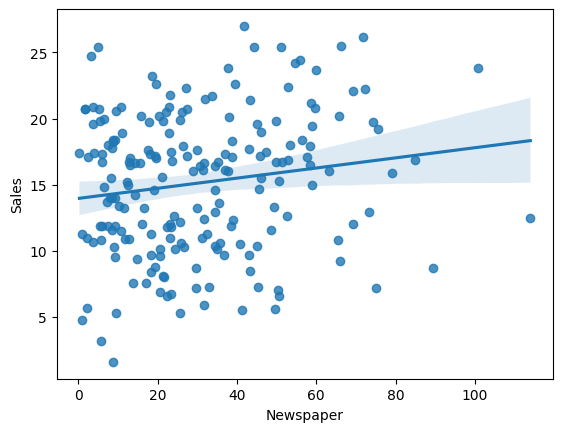

In [ ]:
sns.regplot(x=X['Newspaper'],y=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=mlr.predict(X_test)
y_pred

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067, 20.76476044,
       24.47187353, 16.80643646, 15.62885738, 10.12479884, 18.84601896,
       15.78389695, 10.54297035, 18.92928707, 15.52557996, 17.8412711 ,
       15.24120343, 13.74212833, 21.0643733 , 10.05392699, 19.26500889,
       11.16451173, 11.97211832,  8.61179009, 11.98972141, 12.59914023,
       16.8447954 ,  9.7170889 , 21.09489946, 18.13942474, 19.55008709,
       22.08796224, 17.78527998, 16.53883452, 14.77303861, 21.39458945,
       16.95491635, 17.22755002, 12.31866943, 21.04982199,  7.77473926,
        5.38467516,  9.63139004,  6.89549204, 19.19507436,  7.88125192,
       15.18766673, 13.70978421, 21.0232936 , 20.5350058 , 20.48867548,
       24.86087902, 14.96304281,  7.33545571, 19.35630325, 21.32554066,
       14.7719757 , 17.19642519,  7.11988693, 18.30096543,  9.65158222])

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.9071151423684273
MAE: 1.194741713405674
MSE: 2.370659971225658
RMSE: 1.5396947656031237


In [ ]:
import joblib
joblib.dump(mlr,'model.sav')

['model.sav']

In [ ]:
print('slope:',mlr.coef_)

slope: [ 0.05502392  0.10251003 -0.00150711]


In [ ]:
print('intercept:',mlr.intercept_)

intercept: 4.661439720130817


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)


KNeighborsRegressor()

In [ ]:
y_knn=knn.predict(X_test)
y_knn

array([21.28, 17.3 , 12.18, 18.16, 19.4 , 24.52, 16.24, 17.24, 10.78,
       18.7 , 16.22, 11.14, 18.12, 15.36, 18.24, 16.04, 12.56, 19.08,
        9.9 , 19.3 , 13.1 , 10.84,  7.38, 12.76, 11.54, 18.06, 10.08,
       20.28, 18.28, 19.16, 21.18, 19.76, 15.12, 15.8 , 20.28, 18.06,
       18.  , 11.66, 20.2 ,  7.76,  5.62, 11.56,  6.42, 19.72,  6.9 ,
       12.78, 13.9 , 21.16, 20.66, 20.3 , 23.96, 14.32,  7.38, 19.68,
       21.26, 16.1 , 17.94,  6.66, 18.34, 10.  ])

In [ ]:
print(r2_score(y_test,y_knn))

0.9272993703611314
